# Exploratory Data Analysis of USBP Encounters

In [1]:
# load environment variables
from dotenv import load_dotenv
import os

load_dotenv()

True

## Visualize USBP monthly encounters data

In [2]:
# load usbp encounters monthly data
import pandas as pd
import matplotlib
import matplotlib.style
import matplotlib.pyplot as plt

usbp_data_fp = os.getenv('USBP_DATA_FP')

monthly_counts_df = pd.read_excel(usbp_data_fp, sheet_name='Monthly Count')

# rename Fiscal Year column
monthly_counts_df = monthly_counts_df.rename(columns={'Fiscal\nYear': 'Fiscal Year'})
print(monthly_counts_df.head(n=12))

# 2025 data is incomplete - drop it for now
monthly_counts_df = monthly_counts_df.loc[(monthly_counts_df['Fiscal Year'] != 2025)]


    Fiscal Year         Month  Quantity
0          2000    01 October     89810
1          2000   02 November     75820
2          2000   03 December     67800
3          2000    04 January    177210
4          2000   05 February    202480
5          2000      06 March    211640
6          2000      07 April    172700
7          2000        08 May    158480
8          2000       09 June    105700
9          2000       10 July    113700
10         2000     11 August    115770
11         2000  12 September     99210


             Fiscal Year   2000
Month                          
01 October          2000  89810
02 November         2000  75820
03 December         2000  67800
             Fiscal Year   2010
Month                          
01 October          2010  42300
02 November         2010  34120
03 December         2010  26180
             Fiscal Year   2020
Month                          
01 October          2020  36040
02 November         2020  34110
03 December         2020  33370
             Fiscal Year    2024
Month                           
01 October          2024  190450
02 November         2024  192360
03 December         2024  251180


<Axes: title={'center': 'Monthly USBP Encounters'}, xlabel='Month', ylabel='Encounters'>

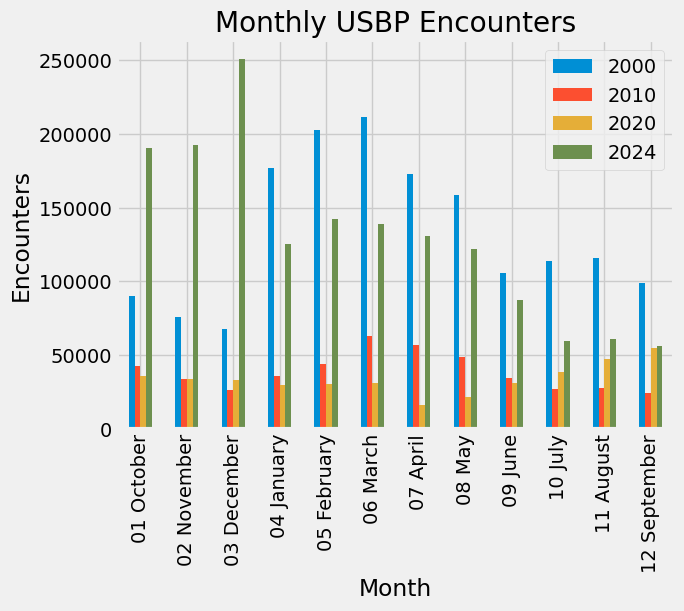

In [ ]:
# plot unstacked bar charts of monthly usbp encounters for select years

years = [2000, 2010, 2020, 2024]

dfs = []
for year in years:
    year_df = monthly_counts_df.loc[(monthly_counts_df['Fiscal Year'] == year)].set_index('Month')
    year_df = year_df.rename(columns={'Quantity': f'{year}'}) # renamed for ease of plotting
    dfs.append(year_df)
    print(year_df.head(n=3))
years_df = pd.concat(dfs, axis=1) # concat dataframes horizontally

with plt.style.context('fivethirtyeight'): # see https://stackoverflow.com/questions/45103486/use-different-style-for-each-figure
    years_df.plot(kind='bar', y=[col for col in years_df.columns if col != 'Fiscal Year'], ylabel='Encounters', title='Monthly USBP Encounters')


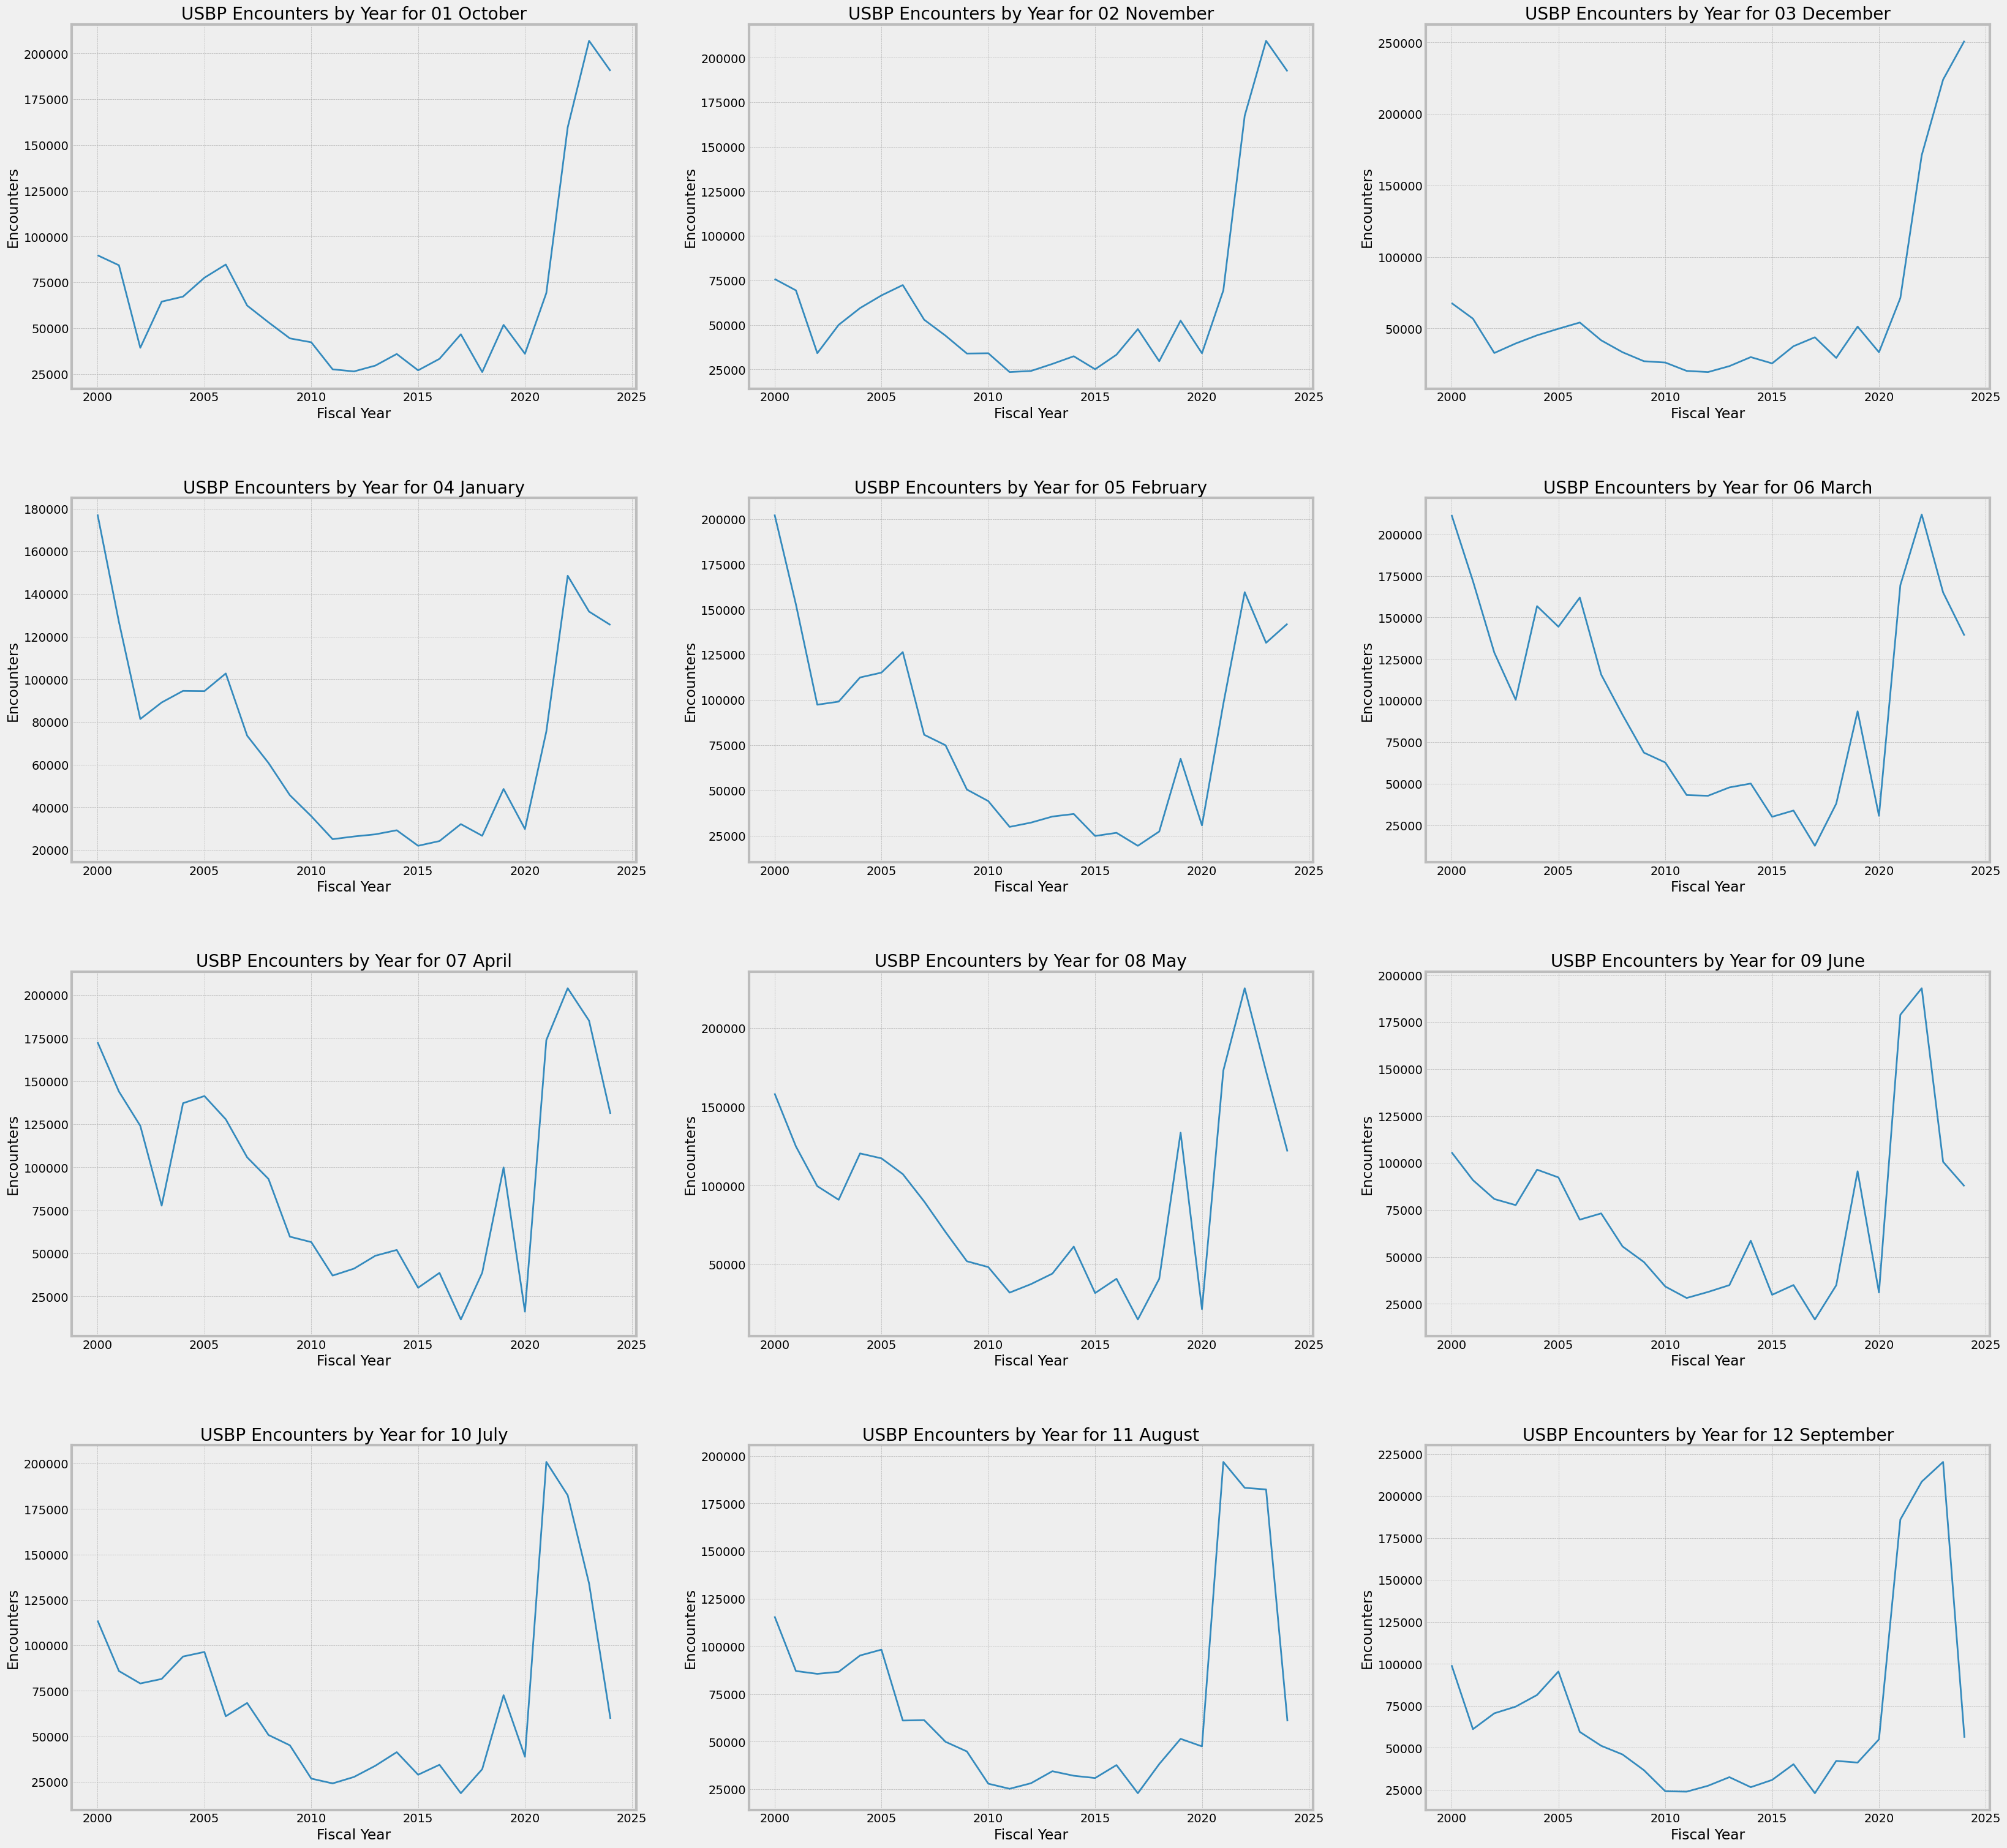

In [12]:
# plot line charts of total encounters for each months across all years

encounters_by_month = monthly_counts_df.groupby(['Month','Fiscal Year'])['Quantity'].sum()

with plt.style.context('bmh'):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(36, 36))
    plt.subplots_adjust(hspace=0.3)

    months = monthly_counts_df['Month'].unique()
    for i, month in enumerate(months):
        month_data = encounters_by_month[month]
        month_data.plot(kind='line', ax=axes[i // 3, i % 3], y='Quantity', ylabel='Encounters', title=f'USBP Encounters by Year for {month}')


Month
01 October       67051.2
02 November      62485.2
03 December      60282.8
04 January       70177.6
05 February      80671.2
06 March        100952.8
07 April         93983.2
08 May           89279.6
09 June          71187.2
10 July          69309.2
11 August        71422.0
12 September     68516.0
Name: Quantity, dtype: float64


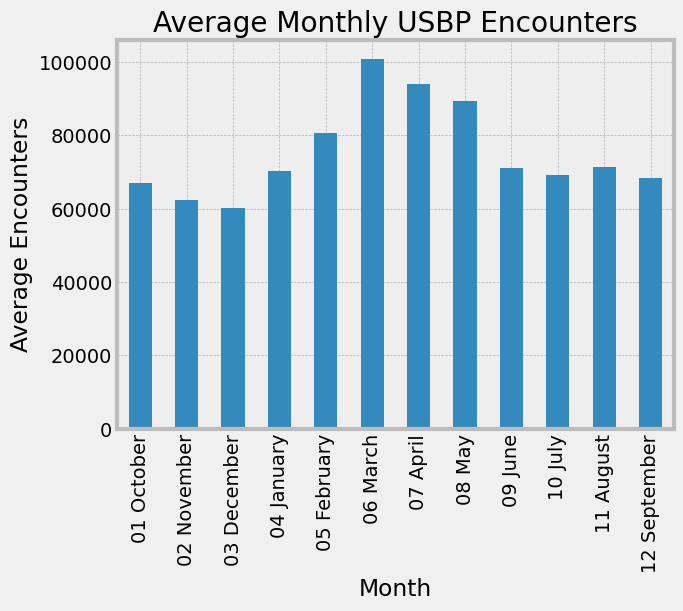

In [14]:
# plot unstacked bar chart of average usbp encounters for each month across all years

monthly_avgs = monthly_counts_df.groupby(by=['Month'])['Quantity'].mean()
print(monthly_avgs)

with plt.style.context('bmh'):
    monthly_avgs.plot(kind='bar', ylabel='Average Encounters', title='Average Monthly USBP Encounters')


Fiscal Year
2000    1590320
2001    1255920
2002     953680
2003     931900
2004    1160370
2005    1189040
2006    1089100
2007     876820
2008     723880
2009     556040
2010     463390
2011     340260
2012     364770
2013     420790
2014     486650
2015     337130
2016     415810
2017     310520
2018     404140
2019     859500
2020     405050
2021    1662180
2022    2214670
2023    2063700
2024    1557320
Name: Quantity, dtype: int64


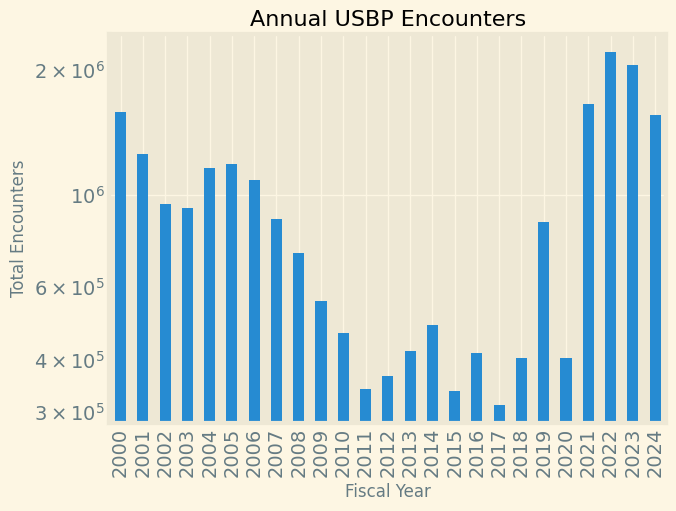

In [15]:
# plot unstacked bar chart of annual usbp encounters across all years

annual_totals = monthly_counts_df.groupby(by='Fiscal Year')['Quantity'].sum()
print(annual_totals)

with plt.style.context('Solarize_Light2'):
    annual_totals.plot(kind='bar', ylabel='Total Encounters', title='Annual USBP Encounters')
    plt.yscale('log')


## Visualize USBP regional monthly encounters data

In [7]:
# load usbp encounters regional monthly data
import pandas as pd
import matplotlib
import matplotlib.style
import matplotlib.pyplot as plt

usbp_data_fp = os.getenv('USBP_DATA_FP')

reg_monthly_counts_df = pd.read_excel(usbp_data_fp, sheet_name='Monthly Region')

# rename Fiscal Year column
reg_monthly_counts_df = reg_monthly_counts_df.rename(columns={'Fiscal\nYear': 'Fiscal Year'})
print(reg_monthly_counts_df.head(n=12))

# 2025 data is incomplete - drop it for now
reg_monthly_counts_df = reg_monthly_counts_df.loc[(reg_monthly_counts_df['Fiscal Year'] != 2025)]


    Fiscal Year        Month                 Region  Quantity
0          2000   01 October         Coastal Border       740
1          2000   01 October   Northern Land Border      1250
2          2000   01 October  Southwest Land Border     87820
3          2000  02 November         Coastal Border       500
4          2000  02 November   Northern Land Border       960
5          2000  02 November  Southwest Land Border     74360
6          2000  03 December         Coastal Border       530
7          2000  03 December   Northern Land Border      1010
8          2000  03 December  Southwest Land Border     66260
9          2000   04 January         Coastal Border       690
10         2000   04 January   Northern Land Border      1140
11         2000   04 January  Southwest Land Border    175380


Year: 2000
Region
Coastal Border              9720
Northern Land Border       14170
Southwest Land Border    1566420
Name: Quantity, dtype: int64
---------------------------------------------
Year: 2010
Region
Coastal Border             8230
Northern Land Border       7440
Southwest Land Border    447750
Name: Quantity, dtype: int64
---------------------------------------------
Year: 2020
Region
Coastal Border             2260
Northern Land Border       2170
Southwest Land Border    400660
Name: Quantity, dtype: int64
---------------------------------------------
Year: 2024
Region
Coastal Border              3060
Northern Land Border       23730
Southwest Land Border    1530540
Name: Quantity, dtype: int64
---------------------------------------------


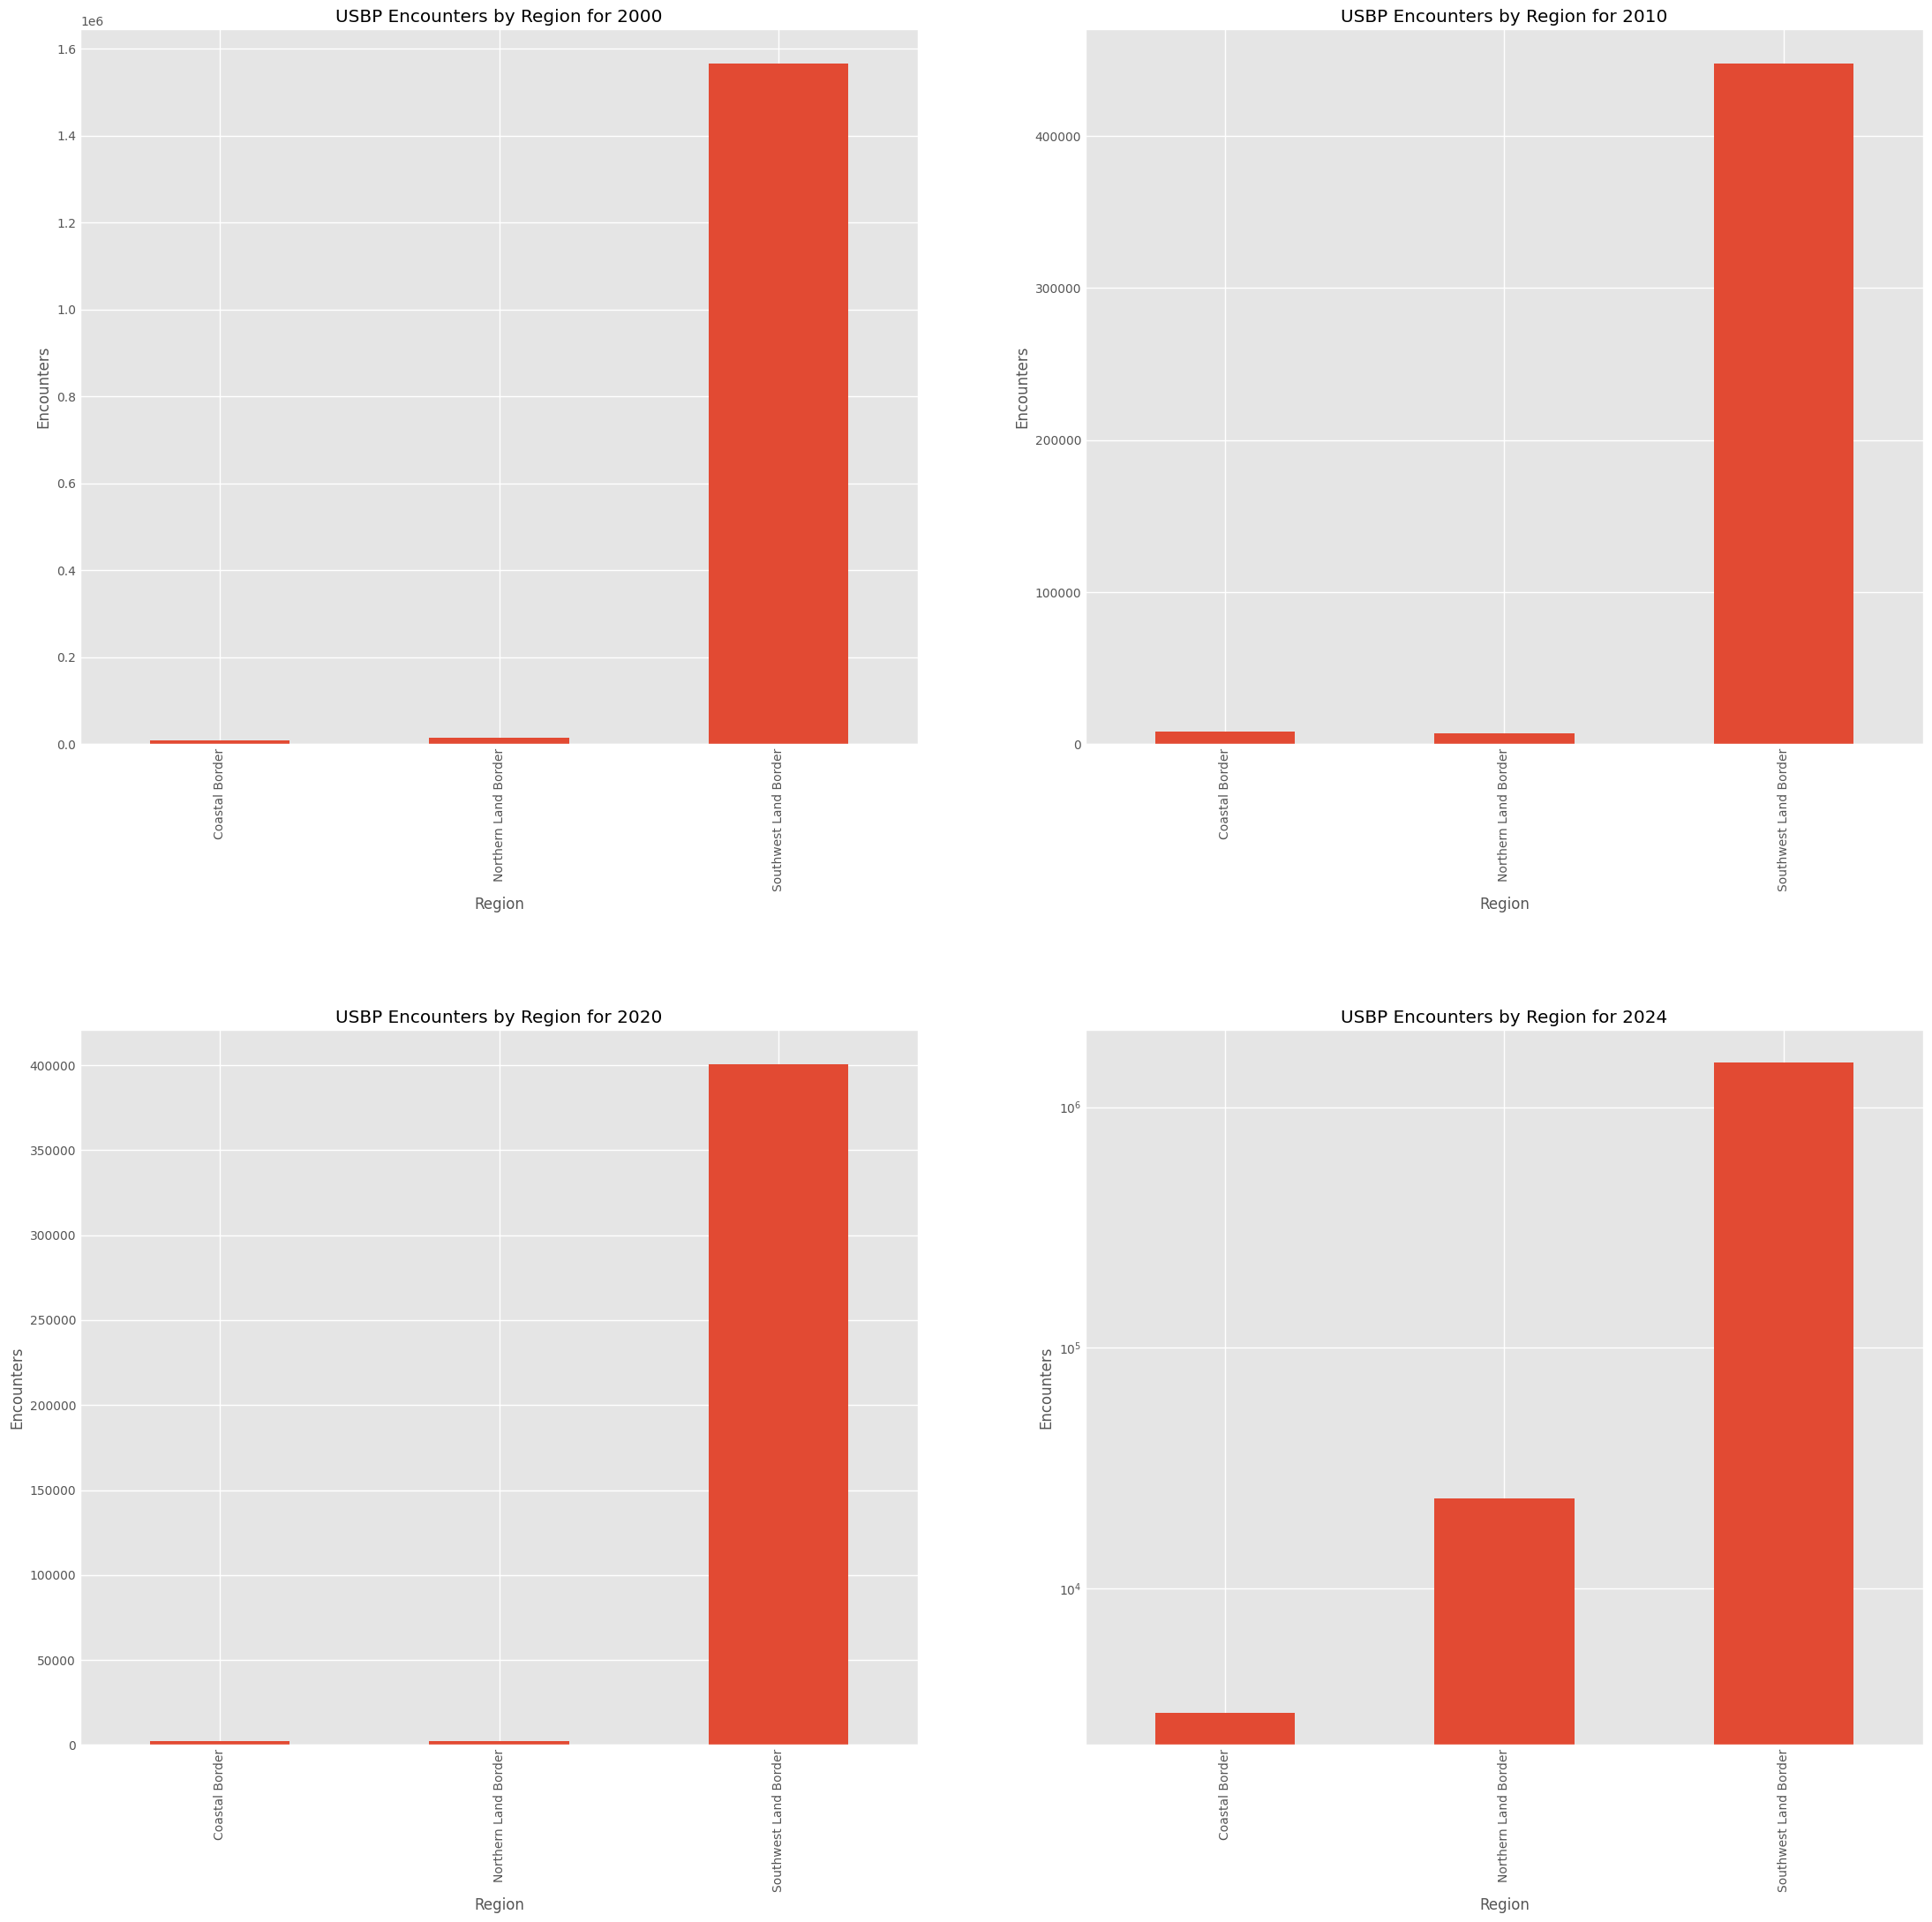

In [17]:
# plot unstacked bar charts of usbp encounters across all months per region for select years

years = [2000, 2010, 2020, 2024]

with plt.style.context('ggplot'):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 24))
    plt.subplots_adjust(hspace=0.4)
    plt.yscale('log')

    for i, year in enumerate(years):
        year_data = reg_monthly_counts_df.loc[(reg_monthly_counts_df['Fiscal Year'] == year)].groupby(by='Region')['Quantity'].sum()
        print(f'Year: {year}\n{year_data}\n{'-'*45}')
        year_data.plot(kind='bar', ax=axes[i // 2, i % 2], y='Quantity', ylabel='Encounters', title=f'USBP Encounters by Region for {year}')


Coastal Border annual encounters:
Fiscal Year
2000     9720
2001     9310
2002    10070
2003    12860
2004     9190
Name: Quantity, dtype: int64
--------------------------------------------------
Northern Land Border annual encounters:
Fiscal Year
2000    14170
2001    15200
2002    13290
2003    12340
2004    10960
Name: Quantity, dtype: int64
--------------------------------------------------
Southwest Land Border annual encounters:
Fiscal Year
2000    1566420
2001    1231420
2002     930350
2003     906740
2004    1140240
Name: Quantity, dtype: int64
--------------------------------------------------


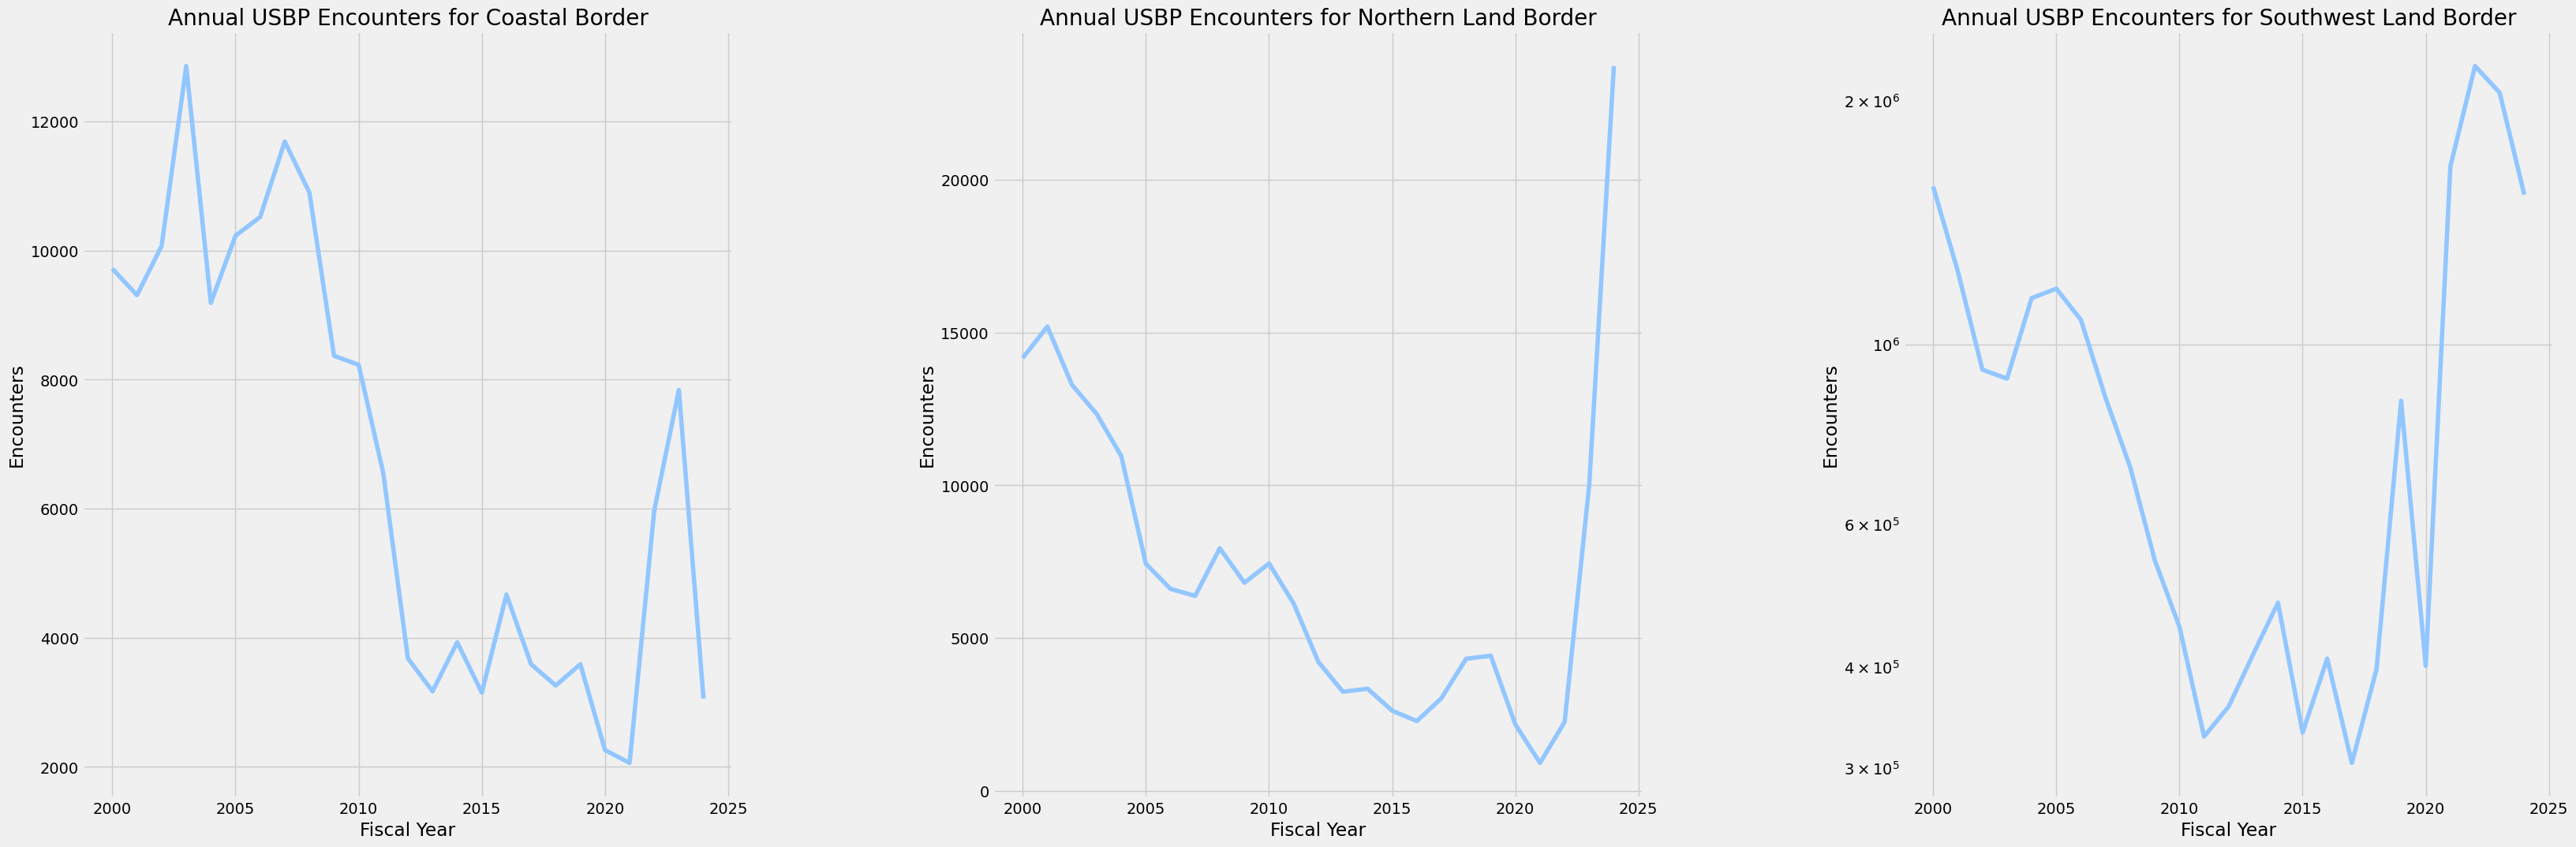

In [ ]:
# plot line chart of annual border crossings for each region

reg_annual_counts = reg_monthly_counts_df.groupby(by=['Region','Fiscal Year'])['Quantity'].sum()

with plt.style.context('seaborn-v0_8-pastel'):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(36, 12))
    plt.subplots_adjust(wspace=0.4)
    plt.yscale('log')

    regions = reg_monthly_counts_df['Region'].unique()
    for i, region in enumerate(regions):
        annual_counts = reg_annual_counts[region]
        print(f'{region} annual encounters:\n{annual_counts.head(n=5)}\n{'-'*50}')
        annual_counts.plot(kind='line', ax=axes[i], y='Quantity', ylabel='Encounters', title=f'Annual USBP Encounters for {region}')
